# Cavité disque

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import meep as mp

In [4]:
# Set up the cavity

r = 1
pml = 0.1
pad = 0.2
n = 1.5
sr = r + pml + pad 
len_scale = 25  #micrometer

resolutions = 200
cell = mp.Vector3(sr, 0, 0)

#geometry
geometry = [mp.Block(center = mp.Vector3(r/2), 
            size = mp.Vector3(r,mp.inf, mp.inf),
            material = mp.Medium(index=n))]

#dimensions
dimensions = mp.CYLINDRICAL
#PML
pml_layers= [mp.PML(pml)]

#source
wl = 2
fcen = len_scale/wl
df = 10

src = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component= mp.Ez, center=mp.Vector3(0.6))]

#simulation
sim = mp.Simulation(cell_size = cell,
                    geometry = geometry,
                    boundary_layers=pml_layers,
                    resolution=resolutions,
                    dimensions = dimensions,
                    sources= src,
                    m = 3)


In [3]:
# define step function to collect field Ez
def append_fields(sim):
    ez_fields.append(sim.get_array(center=pt_observed, size=mp.Vector3(), component=mp.Ez))
    

In [5]:
sim.restart_fields()
ez_fields = []
pt_observed = mp.Vector3(0.3)
sim.run(mp.after_time(0,append_fields),
        until_after_sources = 200)

-----------
Initializing structure...
time for choose_chunkdivision = 8.91685e-05 s
Working in Cylindrical dimensions.
Computational cell is 1.3 x 0 x 0.005 with resolution 200
     block, center = (0.5,0,0)
          size (1,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.00109601 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=201.0)

Meep progress: 85.365/201.0 = 42.5% done in 4.0s, 5.4s to go
on time step 34200 (time=85.5), 0.000116962 s/step
Meep progress: 172.78/201.0 = 86.0% done in 8.0s, 1.3s to go
on time step 69179 (time=172.947), 0.000114354 s/step
run 0 finished at t = 201.0 (80400 timesteps)


<IPython.core.display.Javascript object>


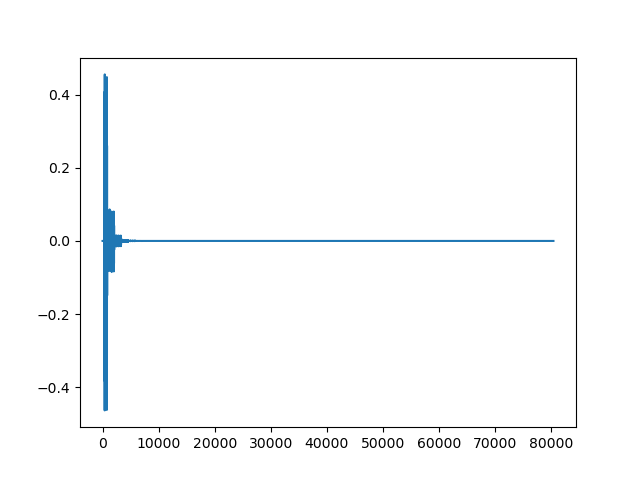

/home/hong/anaconda3/envs/mp/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [6]:
plt.figure()
plt.plot(ez_fields)
plt.show()